In [30]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
nx.__version__

'2.5'

# Introduction to networks

Let's construct an undirected network by hand.

In [2]:
G = nx.Graph()

Adding nodes:

In [3]:
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_nodes_from([5, 6, 7, 8, 9, 10, 11])

In [9]:
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(2, 3)
G.add_edge(2, 4)
G.add_edge(3, 4)

nx.add_path(G, [4, 5, 6, 7, 8])

nx.add_cycle(G, [8, 9, 10, 11])
G.add_edges_from([(8, 10), (9, 11)])

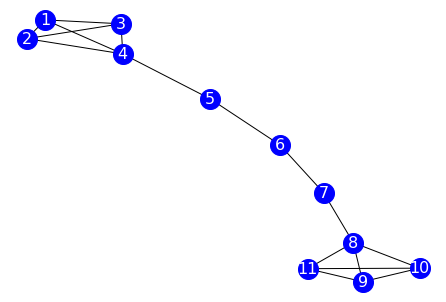

In [20]:
nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=400,
        font_color='white',
        font_size=16,
       )

In [36]:
nx.adjacency_matrix(G)

<11x11 sparse matrix of type '<class 'numpy.int64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [42]:
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]])

In [21]:
G.number_of_nodes()

11

In [22]:
G.number_of_edges()

16

In [23]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))

In [24]:
list(G.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [25]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (8, 11), (8, 10), (9, 10), (9, 11), (10, 11)])

In [26]:
list(G.edges())

[(1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (8, 11),
 (8, 10),
 (9, 10),
 (9, 11),
 (10, 11)]

Get the neighbor of a node:

In [27]:
G.neighbors(4)

In [28]:
list(G.neighbors(4))

[1, 2, 3, 5]

Another way to get the neighbor:

In [29]:
G[4]

AtlasView({1: {}, 2: {}, 3: {}, 5: {}})

In [30]:
list(G[4])

[1, 2, 3, 5]

What's the degree of a node?

In [33]:
len(G[4])

4

In [32]:
G.degree(4)

4

Get the degrees of all nodes:

In [34]:
G.degree()

DegreeView({1: 3, 2: 3, 3: 3, 4: 4, 5: 2, 6: 2, 7: 2, 8: 4, 9: 3, 10: 3, 11: 3})

In [35]:
dict(G.degree())

{1: 3, 2: 3, 3: 3, 4: 4, 5: 2, 6: 2, 7: 2, 8: 4, 9: 3, 10: 3, 11: 3}

Degree distribution:

In [38]:
node_degree = pd.Series(dict(G.degree()), name='degree')
node_degree

1     3
2     3
3     3
4     4
5     2
6     2
7     2
8     4
9     3
10    3
11    3
Name: degree, dtype: int64

In [39]:
node_degree.value_counts()

3    6
2    3
4    2
Name: degree, dtype: int64

In [40]:
node_degree.value_counts(normalize=True).sort_index()

2    0.272727
3    0.545455
4    0.181818
Name: degree, dtype: float64

<AxesSubplot:xlabel='degree', ylabel='probability'>

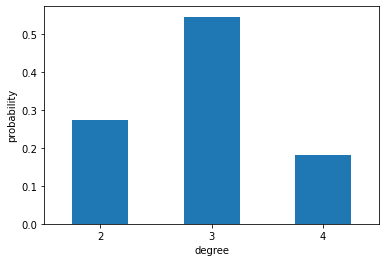

In [41]:
node_degree.value_counts(normalize=True).sort_index().plot.bar(xlabel='degree', ylabel='probability', rot=0)

## Weighted network

In [3]:
W = nx.Graph()

Nodes are implicitly added to the network when adding edges. When adding an edge, we can specify its properties:

In [4]:
W.add_edge(1, 2, weight=4)
W.add_edge(1, 3, weight=8)
W.add_edge(1, 4, weight=2)
W.add_edge(2, 3) # default weight is 1
W.add_edge(2, 4)
W.add_edge(3, 4)

nx.add_path(W, [4, 5, 6, 7, 8], weight=1)

nx.add_cycle(W, [8, 9, 10, 11], weight=2)
W.add_edges_from([(8, 10), (9, 11)], weight=4)

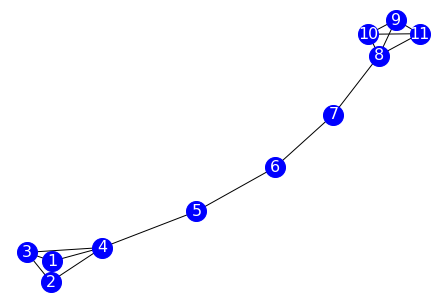

In [8]:
nx.draw(W,
        with_labels=True,
        node_color='blue',
        node_size=400,
        font_color='white',
        font_size=16,
       )

In [7]:
nx.adjacency_matrix(W).todense()

matrix([[0, 4, 8, 2, 0, 0, 0, 0, 0, 0, 0],
        [4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [8, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 2, 4, 2],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 4],
        [0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 2],
        [0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0]])

Node degree:

In [10]:
W.degree()

DegreeView({1: 3, 2: 3, 3: 3, 4: 4, 5: 2, 6: 2, 7: 2, 8: 4, 9: 3, 10: 3, 11: 3})

Considering weights (node strength):

In [11]:
W.degree(weight='weight')

DegreeView({1: 14, 2: 6, 3: 10, 4: 5, 5: 2, 6: 2, 7: 2, 8: 9, 9: 8, 10: 8, 11: 8})

## Directed network

In [25]:
D = nx.DiGraph()

In [26]:
D.add_edge(1, 2, w=4) # now this edge points from 1 to 2
D.add_edge(2, 3, w=8) # let's call the weight property w
D.add_edge(3, 4, w=1)
D.add_edge(1, 4, w=2, formed='2020') # we can add any properties

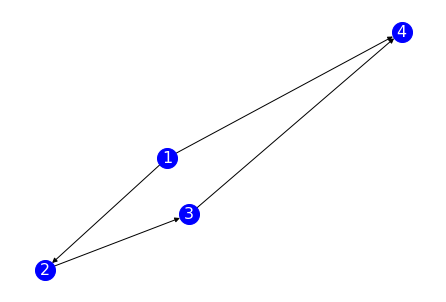

In [16]:
nx.draw(D,
        with_labels=True,
        node_color='blue',
        node_size=400,
        font_color='white',
        font_size=16,
       )

In [33]:
nx.adjacency_matrix(D).todense()

matrix([[0, 1, 0, 1],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0]])

In [34]:
nx.adjacency_matrix(D, weight='w').todense()

matrix([[0, 4, 0, 2],
        [0, 0, 8, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0]])

In [17]:
D.in_degree(3)

1

In [28]:
D.in_degree(3, weight='w')

8

In [29]:
D.in_degree()

InDegreeView({1: 0, 2: 1, 3: 1, 4: 2})

In [30]:
D.out_degree()

OutDegreeView({1: 2, 2: 1, 3: 1, 4: 0})

In [31]:
D.out_degree(weight='w')

OutDegreeView({1: 6, 2: 8, 3: 1, 4: 0})

# Networks in Science of Science

## Mentorship network

# Centrality

We will work with the co-authorship network between network scientists. It was downloaded at http://www-personal.umich.edu/~mejn/netdata/netscience.zip. 

The `netscience.gml` file stores the network. It's just a text file.

The first few lines of the data:

In [1]:
! head -20 ~/datasets/s4/netscience.gml

Creator "Mark Newman on Sat Jul 22 06:24:59 2006"
graph
[
  directed 0
  node
  [
    id 0
    label "ABRAMSON, G"
  ]
  node
  [
    id 1
    label "KUPERMAN, M"
  ]
  node
  [
    id 2
    label "ACEBRON, J"
  ]
  node


after listing nodes, list edges:

In [2]:
! awk 'FNR>=7940 && FNR<=7962' ~/datasets/s4/netscience.gml

  node
  [
    id 1587
    label "ZHU, J"
  ]
  node
  [
    id 1588
    label "ZIMMERMANN, M"
  ]
  edge
  [
    source 1
    target 0
    value 2.5
  ]
  edge
  [
    source 3
    target 2
    value 0.25
  ]
  edge


Load the network:

In [6]:
netsci_coauthor_net = nx.read_gml('../../../datasets/s4/netscience.gml')

In [7]:
netsci_coauthor_net.number_of_nodes()

1589

In [8]:
netsci_coauthor_net.number_of_edges()

2742

Before analyzing a network, it's worth to check whether the network is connected:

In [9]:
nx.number_connected_components(netsci_coauthor_net)

396

In [10]:
cc = list(nx.connected_components(netsci_coauthor_net))

In [11]:
len(cc)

396

In [12]:
cc[0]

{'ABRAMSON, G', 'KUPERMAN, M', 'MORELLI, L', 'ZANETTE, D'}

In [13]:
lcc = max(cc, key=len)

In [14]:
len(lcc)

379

We will analyze the largest connected component of the network:

In [15]:
netsci_coauthor_net_lcc = netsci_coauthor_net.subgraph(lcc)

In [16]:
netsci_coauthor_net_lcc.number_of_nodes()

379

In [17]:
netsci_coauthor_net_lcc.number_of_edges()

914

Degree centrality:

In [18]:
netsci_degree = nx.degree_centrality(netsci_coauthor_net_lcc)

It returns a dict:

In [20]:
netsci_degree['NEWMAN, M']

0.07142857142857142

Eigenvector centrality:

In [21]:
netsci_eigen = nx.eigenvector_centrality(netsci_coauthor_net_lcc)

PageRank centrality:

In [22]:
netsci_pagerank = nx.pagerank(netsci_coauthor_net_lcc)

Closeness centrality:

In [23]:
netsci_close = nx.closeness_centrality(netsci_coauthor_net_lcc)

Betweenness centrality:

In [24]:
netsci_between = nx.betweenness_centrality(netsci_coauthor_net_lcc)

List of centralities provided by NetworkX: https://networkx.org/documentation/stable/reference/algorithms/centrality.html

We will incorporate the centrality information into the network visualization. Before doing anything, just draw the network:

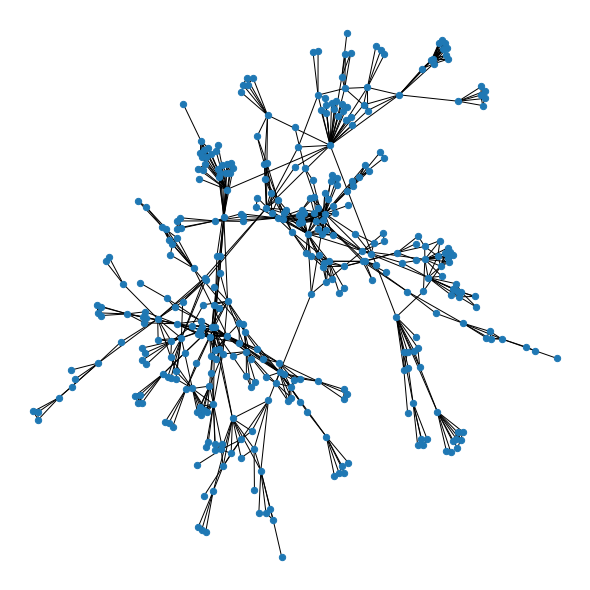

In [32]:
plt.figure(figsize=(8,8)) # put it on a large canvas
nx.draw(netsci_coauthor_net_lcc,
#         with_labels=True, # we won't show node labels
        node_size=40,
#         font_color='white',
#         font_size=16,
       )

Let's change the size of a node based on its centrality measures:

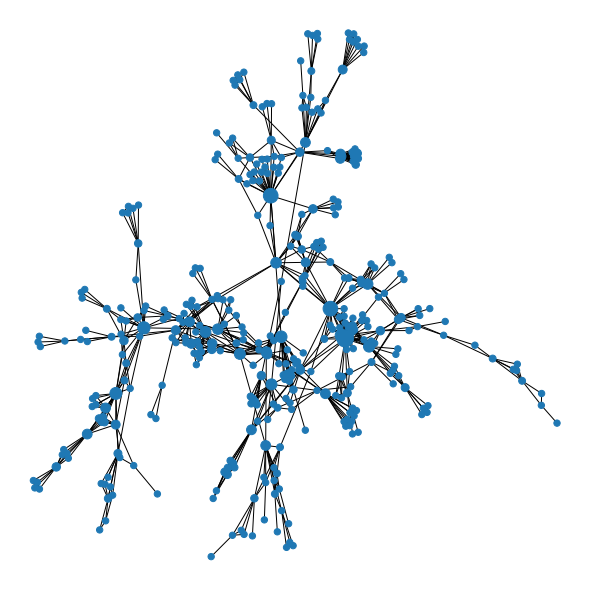

In [35]:
plt.figure(figsize=(8,8))
nx.draw(netsci_coauthor_net_lcc, 
        with_labels=False, 
        node_size=[max(3000*netsci_degree[n], 40) for n in list(netsci_coauthor_net_lcc)], # based on degree centrality
       )

# Network Communities

# Network visualization

Have you noticed that node positions change from the previous version? We can fix node positions by providing pre-calculated positions. This is called graph layout. NetworkX provides different layout algorithms: https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

We will use the spring layout:

In [36]:
netsci_pos = nx.spring_layout(netsci_coauthor_net_lcc)

It returns a dict containing xy coordinates of nodes:

In [37]:
netsci_pos['NEWMAN, M']

array([0.20498958, 0.33928373])

Text(-0.7, 1, 'degree centrality')

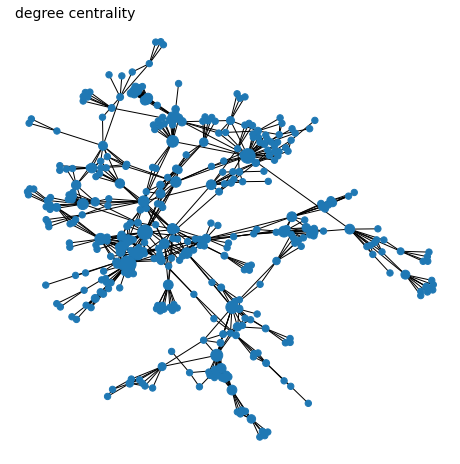

In [43]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
nx.draw(netsci_coauthor_net_lcc, 
        ax=ax,
        pos=netsci_pos, # specify node positions
        with_labels=False, 
        node_size=[max(3000*netsci_degree[n], 40) for n in list(netsci_coauthor_net_lcc)], # based on degree centrality
       )
ax.text(-.7, 1, 'degree centrality', fontsize=14)